In [15]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [16]:
con = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[con, ['Length2', 'Weight']]

In [17]:
fish_target = df.loc[con, ['Species']]

In [18]:
from sklearn.model_selection import train_test_split

In [53]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

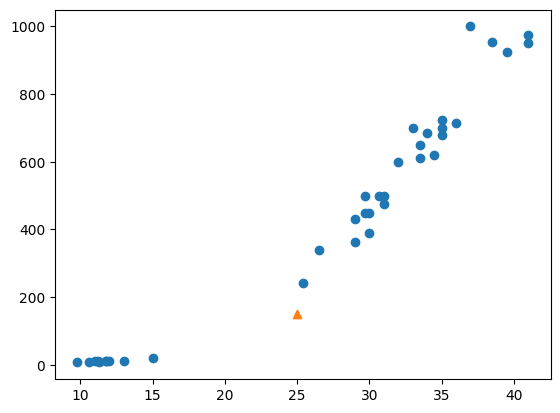

In [34]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker = '^')

In [35]:
kn.kneighbors([[25, 150]])

C:\Users\seong\OneDrive - 한성대학교\바탕 화면\공부\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.48375378, 138.32150953, 140.62090883,
         140.72046759]]),
 array([[26, 12,  1, 24, 33]]))

In [38]:
mean = train_input.mean()
std = train_input.std()

In [40]:
train_scaled = (train_input - mean) / std

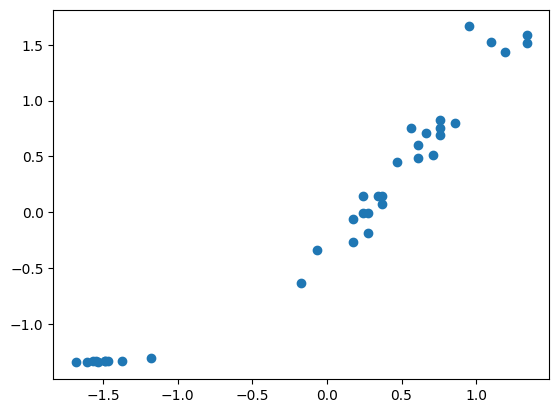

In [41]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight'])

In [42]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [43]:
test_scaled = (test_input - mean) / std

In [44]:
kn.score(test_scaled, test_target)

1.0

In [54]:
new = ([25, 150] - mean) / std
kn.predict([new])

C:\Users\seong\OneDrive - 한성대학교\바탕 화면\공부\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)